#Task One

Data URL: https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast


Reason/motivation for choosing this dataset:
From my research and experience I found out that there are seasons sales are lower or higher than normal. If sales company like Tesco, Walmart, ShopRite (Nigeria) has no idea of these seasons, they will lose too much money. Predicting future sales is one of the most important aspect for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for big companies like Tesco, Walmart and ShopRite (Nigeria). In other to solve this problem. My aim in this project, Using the Walmart Datasets as a case study, is to build a model which predicts sales of the stores. With this model, these business organisations can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.

Features (variables or columns) and rows are in dataset.
There are four csv file in the datasets, but I will be selecting 8 columns from the four csv files, and merge them together to be one dataset, it has the total of 421570 rows, but 6435 rows will be used.

•	13 columns

•	421570 rows

•	Dependent variable or Output variable is Weekly_Sales column

#Objective
To obtain a comprehensive understanding of the factors that affect the sales of a product, I intend to conduct an analysis of the dataset. My goal is to determine whether sales are influenced by time-based and space-based factors. I will also investigate the extent to which holidays impact sales in a store. This analysis will provide the company with valuable insights that can be utilized to improve sales

#ANALYTICAL QUESTION

What specific time-based and space-based or other factors have the greatest impact on sales, and how can the company leverage this information to improve sales?




In [ ]:
#importing files from google colab
from google.colab import files


In [ ]:
#first upload, train dataset
upload_1 = files.upload()

Saving train.csv to train (1).csv


In [ ]:
#second upload,feature dataset
upload_2 = files.upload()

Saving features.csv to features (1).csv


In [ ]:
#third upload, store dataset
upload_3 = files.upload()

Saving stores.csv to stores (1).csv


#Task Two

#Introduction

The purpose of this notebook is to examine the different factors that impact Walmart product sales, such as store size, temperature, and holiday periods. By analyzing the dataset, valuable insights will be obtained that can help identify the primary factors that drive weekly sales and create a model that can be used for other likely kind of stores that needs same solution

In [ ]:
#importing Necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import pandas as pd
import io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn.metrics import r2_score
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go

In [ ]:
#uploading train dataset
df_train = pd.read_csv(io.BytesIO(upload_1['train.csv']))
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
#uploading features dataset
df_fea = pd.read_csv(io.BytesIO(upload_2['features.csv']))
df_fea.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
#uploading store dataset
df_stores = pd.read_csv(io.BytesIO(upload_3['stores.csv']))
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#Merging the columns

I will be merging the three datasets,so i can extract the columns that will be used for this work,all dataset as a common variable called "store",only df_train and df_fea has "store and date" columns, so i will be merging df_fea and df_train.After merging feature and train datasets ON "store and date",finally, I will merge  with thhe store datasets ON "store" column

In [ ]:
#merging the train,feature and store dataset to ONE dataset called (df)
df1 = df_train.merge(df_fea, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')
df1.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [ ]:
#let us know the size of the dataset
df1.shape

(421570, 17)

In [ ]:
#Dataset summary
df1.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
#information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

#DATA CLEANING/PRE-PROCESSING

In [ ]:
#checking for missing values using isna()
df1.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

This shows Markdown1 to Markdown5 has alot of missing values, so let us,let us visualize this using Heatmap

<Axes: >

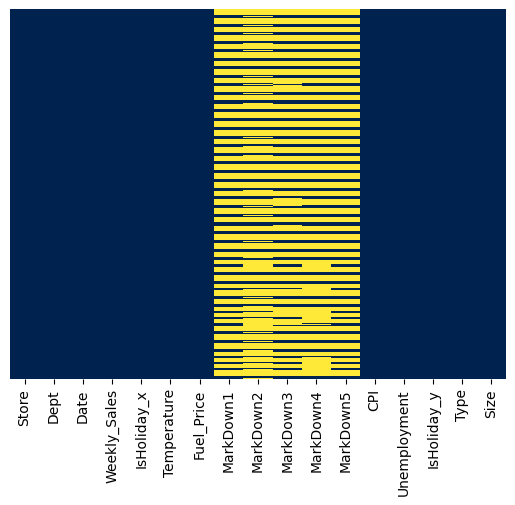

In [ ]:
#visualizing the noises or null values in the dataframe
sb.heatmap(df1.isnull(), yticklabels=False,cbar=False,cmap='cividis')

#Observation One
1.From the above summary of the data, above data,i found out that we have only null values in (markdown 1 to 5)
let us see what this markdown columns looks like,to give us a better and informed decision

description

MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running

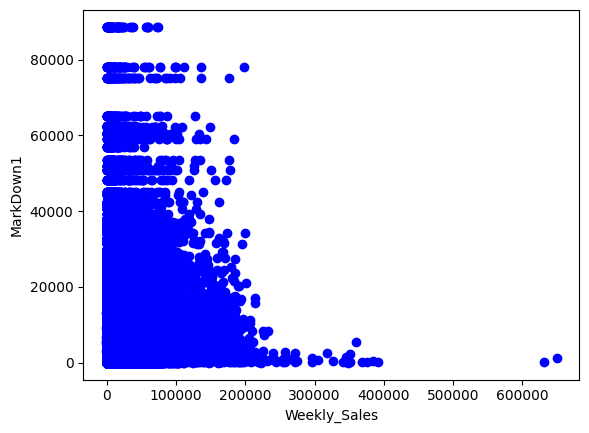

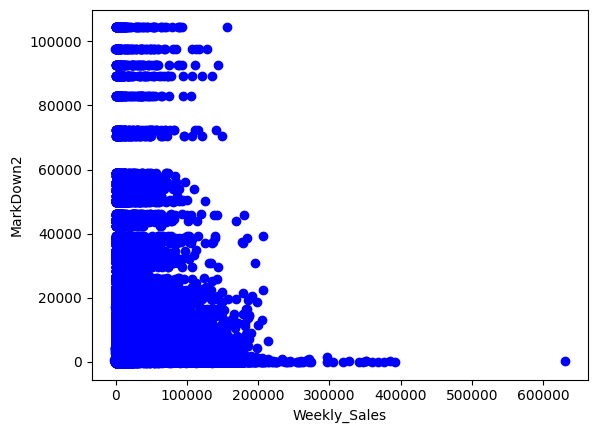

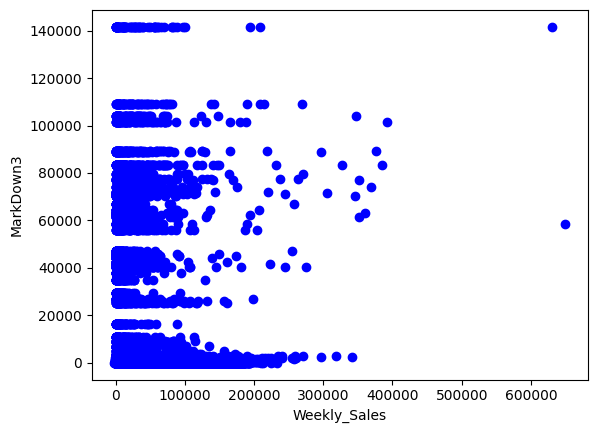

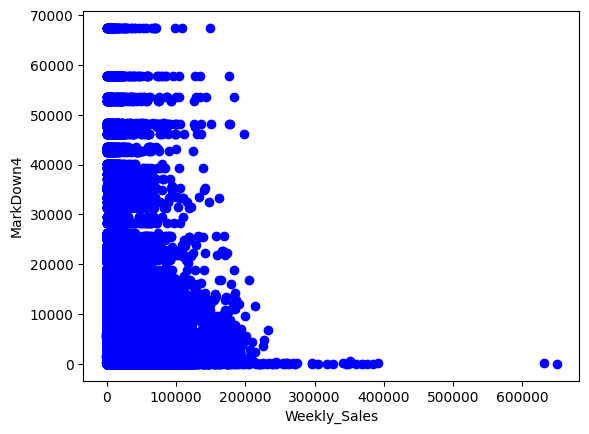

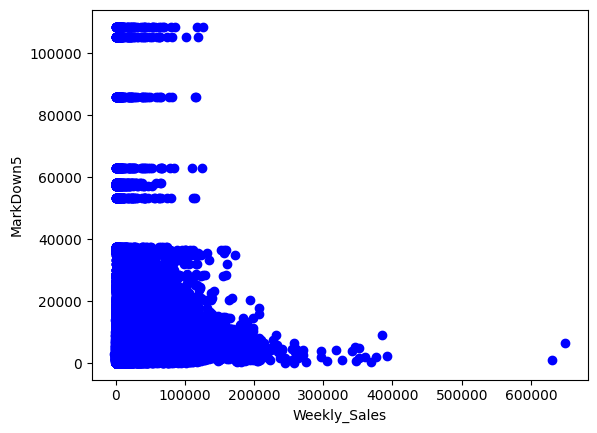

In [ ]:
#checking if there are correlation with each Markdown variables with the output variable (weeklysales)
markD_sales_corr = df1[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5']]
for i in markD_sales_corr:
  plt.scatter(df1.Weekly_Sales,markD_sales_corr[i],color='blue')
  plt.xlabel("Weekly_Sales")
  plt.ylabel(i)
  plt.show()

In [ ]:
#using interger location metthod to select the range of markdown columns
df1.iloc[:,7:12].isna().sum()

MarkDown1    270889
MarkDown2    310322
MarkDown3    284479
MarkDown4    286603
MarkDown5    270138
dtype: int64

Solution to observation One

After examining the correlation between the five Markdown columns and the output variable (Weekly_Sales), it is evident that there is no significant correlation between each Markdown plot and weekly_sales. Therefore, these columns will not provide any meaningful insights and are not required for feature engineering and model building. As they are just anonymized data related to promotional markdowns that Walmart is running, I have decided to drop these columns.


In [ ]:
#Droping NAN values
df1.dropna(axis=1,inplace=True)

NOTE:
Upon observation, I noticed that the columns IsHoliday_x and IsHoliday_y appear to be similar. To verify my insight, I plan to create a plot comparing these two columns and implement an IF statement in my code to confirm whether they are indeed duplicates.

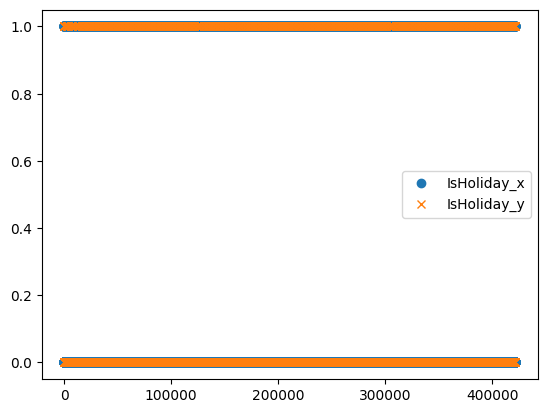

In [ ]:
#Trying to check if df.IsHoliday_x and df.IsHoliday_y are thesame or duplicate
fig, ax = plt.subplots()
ax.plot(df1['IsHoliday_x'], 'o', label='IsHoliday_x')
ax.plot(df1['IsHoliday_y'], 'x', label='IsHoliday_y')
ax.legend()
plt.show()

In [ ]:
#writing a for loop to  check if IsHoliday_x and IsHoliday_  are duplicates
if df1['IsHoliday_x'].equals(df1['IsHoliday_y']):
    print("IsHoliday_x and IsHoliday_y are duplicates")
else:
    print("IsHoliday_x and IsHoliday_ are not duplicates")


IsHoliday_x and IsHoliday_y are duplicates


Findings:

Based on the visualization plot and the IF statement code block check, it was observed that the columns df.IsHoliday_x and df.IsHoliday_y are duplicates. Therefore, only one of them (IsHoliday_x) will be selected, while the other (IsHoliday_y) will be dropped.

In [ ]:

#Droping IsHoliday_y since it is a duplicated
df1.drop('IsHoliday_y',axis=1,inplace=True)


In [ ]:
#renaming IsHoliday_x to  IsHoliday
df1.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


In [ ]:
#The Dataset is clean
df1.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

<Axes: >

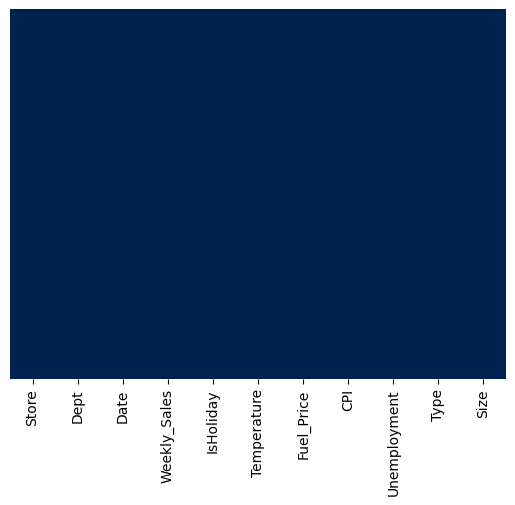

In [ ]:
#visualizing the absence of noise/null value in the dataframe
sb.heatmap(df1.isnull(), yticklabels=False,cbar=False,cmap='cividis')

In this next line of code, i will be checking for outliers, especially for the Weekly_sales column,because it will be helpfull in building the model

<Axes: >

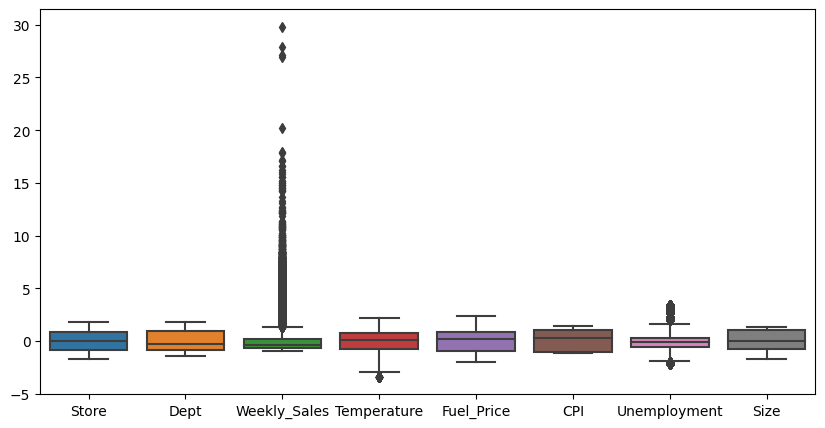

In [ ]:
# identify columns with numeric data type
num_cols = df1.select_dtypes(include=['int', 'float']).columns

# calculate z-score for each numeric column using a function and zscore formula
def calculate_zscore(col):
    mean = np.mean(col)
    std_dev = np.std(col)
    z_scores = (col - mean) / std_dev
    return z_scores

z_scores = df1[num_cols].apply(calculate_zscore)

# create a figure and axes object
fig, ax = plt.subplots(figsize=(10,5))

# create boxplot of z-scores to identify outliers
sb.boxplot(data=z_scores, orient='v', ax=ax)


From the above visualization we see "unemployment" column has outliers, so it wont be neccesarily used in our feature engineering, but  wll "Weekly_sales" column has alot of outlier, so i will be using winsorize to try and minimize the outliers, because that is what will be our output column

Winsorization is a technique used to handle outliers in a dataset. It involves replacing extreme values in a dataset with less extreme values. Specifically, Winsorization replaces extreme values with the smallest or largest non-extreme values in the dataset.

In [ ]:
#importing mstats library
from scipy.stats import mstats

I this next code, i will be using the Winsorize method in removing the outliers and ploting a visualize outlier free boxplot

<Axes: >

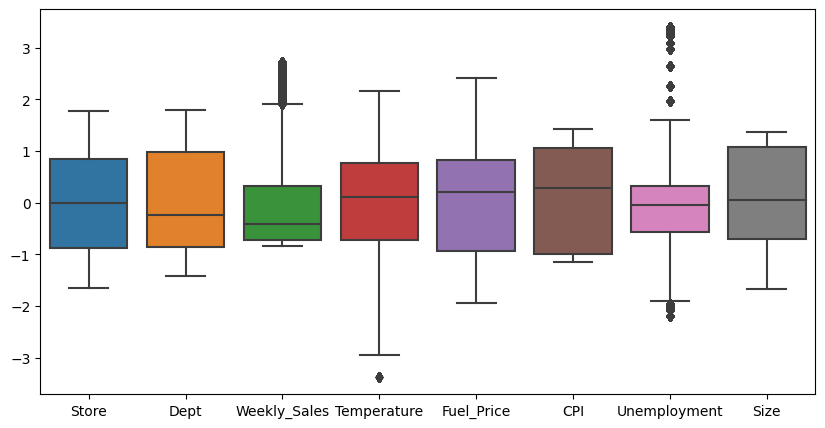

In [ ]:
#outlier in weekly_sales
# Winsorize the data
df1['Weekly_Sales'] = mstats.winsorize(df1['Weekly_Sales'], limits=[0.05, 0.05])

# identify columns with numeric data type
num_cols = df1.select_dtypes(include=['int', 'float']).columns

# calculate z-score for each numeric column using a function and zscore formula
def calculate_zscore(col):
    mean = np.mean(col)
    std_dev = np.std(col)
    z_scores = (col - mean) / std_dev
    return z_scores

z_scores = df1[num_cols].apply(calculate_zscore)

# create a figure and axes object
fig, ax = plt.subplots(figsize=(10,5))

# create boxplot of z-scores to identify outliers
sb.boxplot(data=z_scores, orient='v', ax=ax)

From the visualization above, we can see that the weekly_sales outliers has been minimzed

For easier analysis, i covert my 'Date' columnn which is in object dtype to datetime dtype,so i can extract day,months and year for a proper insight and analysis

In [ ]:
#coverting object type date to datetime
df1['Date']=pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   CPI           421570 non-null  float64       
 8   Unemployment  421570 non-null  float64       
 9   Type          421570 non-null  object        
 10  Size          421570 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 35.8+ MB


In this next cell, i will be extracting month name,week number from  date column after converting it to datetime dtype

In [ ]:
#Extracting Month from the datetime column
df1['Month']=df1['Date'].dt.month_name()
#Extracting week from the datetime column,using a lambda function so i can use isocalender format
df1['week_number'] = df1['Date'].apply(lambda x: x.isocalendar()[1])
#Extracting year from the datetime column
df1['Year']=df1['Date'].dt.year

In [ ]:
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Month,week_number,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,February,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,February,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,February,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,February,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,February,5,2010


I will be using the numpy method np.where to append "Low" or "High" to the "CPI" and "Fuel_Price" columns based on certain ranges in the dataset. Similarly, I will append "Warm", "Cool", "Cold", or "Hot" to the "Temperature" column based on the average temperature in the region. This will make the analysis easier and more understandable.

In [ ]:
#getting the mean values for CPI and fuel_price
mean_CPI= df1['CPI'].mean()
mean_fuel_price=df1['Fuel_Price'].mean()

In [ ]:
# Convert CPI and Fuel price columns to (Low and High)
df1['CPI_val']= np.where(df1['CPI'] <= mean_CPI,'Low','High')
df1['Fuel_Price_val']= np.where(df1['Fuel_Price'] <= mean_fuel_price,'Low','High')
# Convert the Temperature column to (Warm, Cool, Cold, Hot)
df1['Temperature_val']= np.where((df1['Temperature'] <= 65) & (df1['Temperature'] > 45) ,'Warm',
                            np.where((df1['Temperature'] <= 45) & (df1['Temperature'] > 25) ,'Cool'
                            ,
                            np.where((df1['Temperature'] <= 25) & (df1['Temperature'] >= 10) ,'Cold'
                            ,
                            'Hot')))

In [ ]:
#rearranging my desire column and puting it in another variable name
df=df1[['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature','Temperature_val',
       'Fuel_Price','Fuel_Price_val', 'CPI', 'CPI_val', 'Unemployment', 'Type', 'Size', 'Month',
       'week_number', 'Year']]
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Temperature_val,Fuel_Price,Fuel_Price_val,CPI,CPI_val,Unemployment,Type,Size,Month,week_number,Year
0,1,1,2010-02-05,24924.50,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010


#Exploratory Data Analysis (EDA)

#Objective
To obtain a comprehensive understanding of the factors that affect the sales of a product, I intend to conduct an analysis of the dataset. My goal is to determine whether sales are influenced by time-based and space-based factors. I will also investigate the extent to which holidays impact sales in a store. This analysis will provide the company with valuable insights that can be utilized to improve sales

By examining the dataset, I will evaluate the impact of time-based factors such as week, month of the year, and season. Additionally, I will analyze the impact of space-based factors such as temperature of the place, customer demographics, These factors can have a significant influence on the sales of a product.

ANALYTICAL QUESTION

What specific time-based and space-based or other factors have the greatest impact on sales, and how can the company leverage this information to improve sales?

In [ ]:
#getting some of unique values my dataframe
a=df[['IsHoliday','Month', 'Year']]
for i in a:
  unique_of_each=a[i].unique()
  print(f"{i}:{unique_of_each}")

IsHoliday:[False  True]
Month:['February' 'March' 'April' 'May' 'June' 'July' 'August' 'September'
 'October' 'November' 'December' 'January']
Year:[2010 2011 2012]


In [ ]:
# checkig to see the start date and End date
df['Date'].head().append(df['Date'].tail())

<ipython-input-35-d9cb6b9aa24e>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df['Date'].head().append(df['Date'].tail())


0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

From the above ouput,we can see that the dates are from 5th of februray 2010 to 26th of october 2012

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Temperature_val,Fuel_Price,Fuel_Price_val,CPI,CPI_val,Unemployment,Type,Size,Month,week_number,Year
0,1,1,2010-02-05,24924.50,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010


#Time-Based Analysis

Note: In the following cell block, I will analyze the average weekly sales for each month to identify the months with a high amount of sales across all three years (2010-2012).

In [ ]:
#getting the average sales
week_sales = df.groupby('Month')['Weekly_Sales'].mean()
month_sales=week_sales.reset_index()

# Define a color list for the months
color_list = ['#FF5733', '#C70039', '#900C3F', '#581845', '#003f5c', '#2f4b7c','#665191', '#a05195', '#d45087', '#ff7c43', '#ffa600', '#FFC300']

# Create a trace for each month
traces = []
for i, month in enumerate(month_sales['Month']):
    trace = go.Bar(x=[month], y=[month_sales.loc[i, 'Weekly_Sales']], marker_color=color_list[i])
    traces.append(trace)

# Define the layout of the bar plot
layout = go.Layout(
    title='Average sales for each month',
    xaxis=dict(title='Month', titlefont=dict(size=22)),
    yaxis=dict(title='Sales', titlefont=dict(size=22)),
    font=dict(size=20)
)

# Create the figure for the bar plot
fig = go.Figure(data=traces, layout=layout)

# Show the bar plot
fig.show()


From the above plot,we can conclude that the highest sales was in month of December

In the following code block, I will extract the top 5 months with the highest sales percentage. I will use the `quantile` function to filter the top 60% of sales across each month and visualize the top months.

In [ ]:
#where the 'Weekly_Sales' column is greater than or equal to the 60th percentile of 'Weekly_Sales' in the entire DataFrame.
#In other words, it filters out the bottom 40% of sales months.
df_max=month_sales[month_sales['Weekly_Sales']>=month_sales['Weekly_Sales'].quantile(.60)]
#using plotly pie to plot
fig = px.pie(df_max, values='Weekly_Sales', names='Month',
             title='Top 5 months  of  sales',
             hole=0,
             color_discrete_sequence=px.colors.qualitative.Set3,
             )
#update_traces method of fig updates the text information of the pie slices.
fig.update_traces(textinfo='percent+label',
                  pull=[0, 0.2, 0, 0,0],
                  hoverinfo='label+value',
                  hovertemplate='%{label}: %{value}<br>%{percent}')
fig.show()

Rewritten: Based on the pie chart above, December had the highest sales across all three years, followed by November. As we continue our analysis, we will investigate the reasons behind the significant sales during December and November.

#Further Insights on the Holidays weeks

To enhance the clarity of the 'IsHoliday' column, I will use list comprehension to convert 'TRUE' to 'Holiday week' and 'False' to 'Non-holiday'. This will improve the comprehensibility of our analysis.

In [ ]:
#Making a dictionay and asigning key(True and false) and values(Holiday week and non-holiday week)
my_dic= {True:'Holiday week', False:'Non-holiday week'}
#converting the isHoliday column from True to Holiday week, and False to Non-holiday week, using a np.array list comprehension
df['IsHoliday']=np.array([my_dic[i] for i in df['IsHoliday']])

In [ ]:
#Overview on how our datafram looks like after change the Isholiday column
df.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Temperature_val,Fuel_Price,Fuel_Price_val,CPI,CPI_val,Unemployment,Type,Size,Month,week_number,Year
0,1,1,2010-02-05,24924.50,Non-holiday week,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
1,1,2,2010-02-05,50605.27,Non-holiday week,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010
2,1,3,2010-02-05,13740.12,Non-holiday week,42.31,Cool,2.572,Low,211.096358,High,8.106,A,151315,February,5,2010


In [ ]:
df['IsHoliday'].unique()

array(['Non-holiday week', 'Holiday week'], dtype=object)

In this next code block,i want to pick all holiday week sales, so we see which month has more holiday week sales

In [ ]:
#getting all holidays week
df_hols=df[(df.IsHoliday=='Holiday week')]
#Displaying how it looks like
df_hols.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Temperature_val,Fuel_Price,Fuel_Price_val,CPI,CPI_val,Unemployment,Type,Size,Month,week_number,Year
73,1,1,2010-02-12,46039.49,Holiday week,38.51,Cool,2.548,Low,211.24217,High,8.106,A,151315,February,6,2010
74,1,2,2010-02-12,44682.74,Holiday week,38.51,Cool,2.548,Low,211.24217,High,8.106,A,151315,February,6,2010


In [ ]:
#grouping by month column to calculate the average weekly sales for each months
hols=df_hols.groupby('Month')['Weekly_Sales'].mean().reset_index()

# Define a list of four distinct colors
colors = ['#C70039', '#900C3F', '#581845', '#003f5c', '#2f4b7c']

# Create a list of colors for each month, cycling through the four distinct colors using list comprehension
month_colors = [colors[i % len(colors)] for i in range(len(hols))]

#Create traces for the bar chart and set the marker color
trace1 = go.Bar(x=hols['Month'], y=hols['Weekly_Sales'], marker=dict(color=month_colors))

# Define the layout of the bar chart
layout = go.Layout(
    title='Average Weekly sales for each holiday month',
    xaxis=dict(title='Month', titlefont=dict(size=15)),
    yaxis=dict(title='Sales', titlefont=dict(size=15)),
    font=dict(size=15)
)

# Create the figure for the bar chart
fig = go.Figure(data=[trace1], layout=layout)

# Show the bar chart
fig.show()

From the above plot, we noticed that ,There are 4 holiday values such as;

Super Bowl: 12-Feb-2010, 11-Feb-2011, 10-Feb-2012, 8-Feb-2013

Labor Day: 10-Sep-2010, 9-Sep-2011, 7-Sep-2012, 6-Sep-2013

Thanksgiving: 26-Nov-2010, 25-Nov-2011, 23-Nov-2012, 29-Nov-2013

Christmas: 31-Dec-2010, 30-Dec-2011, 28-Dec-2012, 27-Dec-2013

In this next line of Code, i will be grouping by week_number to see which week number has more sales

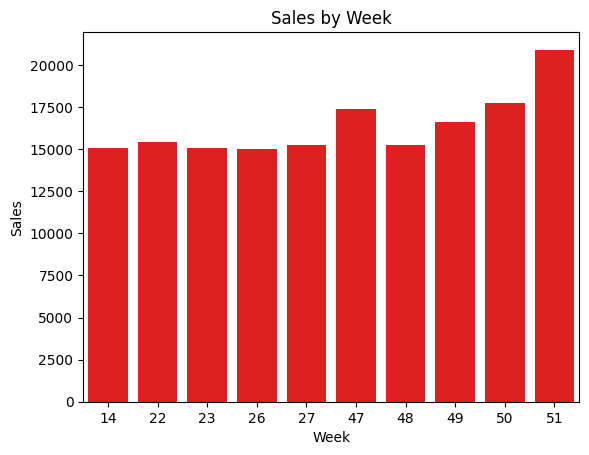

In [ ]:
#grouping by week_number and geting the average sales for each week number,starting from the top 10 in decending order
df_week=df.groupby('week_number')['Weekly_Sales'].mean().sort_values(ascending=False).head(10).reset_index()

# Create bar chart using seaborn
sb.barplot(x='week_number', y='Weekly_Sales', data=df_week, color='r')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Sales by Week')

# Show plot
plt.show()

from the above plot, week 51 has the highest average sales

i will be ploting using a lineplot to see the trend of sales for all three years

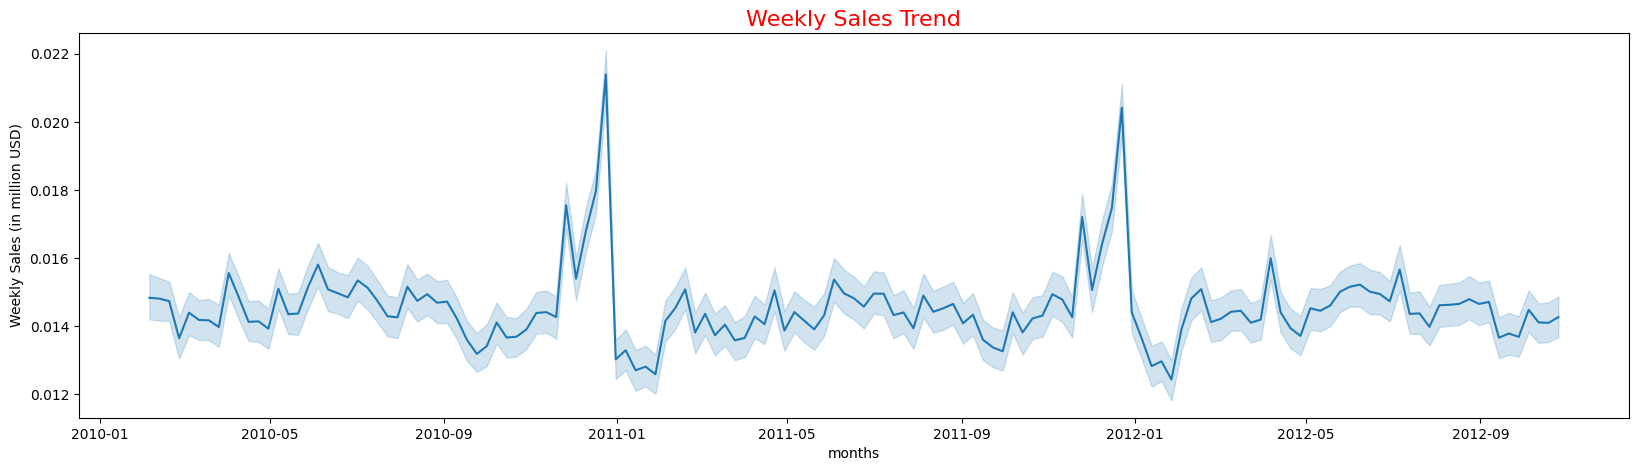

In [ ]:
# plot the line chart of the weekly_sales
fig, ax = plt.subplots(figsize=(20, 5))
sb.lineplot(x=df.Date, y=(df.Weekly_Sales/1e6))
plt.xlabel('months')
plt.ylabel('Weekly Sales (in million USD)')
# set the plot title
plt.title('Weekly Sales Trend',fontdict={'fontsize': 16, 'color':'red'}, pad=5)

#This code creates an empty annotation and sets its visibility to false, used for adding annotations to a matplotlib plot.
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

plt.show()

The line plot shows that Walmart's weekly sales are consistent throughout the year, except for November and December, where there is a noticeable increase, which is likely due to holiday shopping. To take advantage of this trend, Walmart could offer seasonal promotions and ensure a good customer experience on their website and mobile app during festive periods. These actions can potentially increase sales and encourage more customers to shop at Walmart.


#FINDINGS For Time-Based Factors

1.As expected, the average sales during holidays are higher compared to normal dates.

2.The top 4 highest sales periods belong to Christmas, Thanksgiving, and Black Friday.

3.Surprisingly, the 22nd week of the year also ranks as the 5th best sales period. This week falls at the end of May when schools are closed for summer break.

4.Although Christmas holiday sales are traditionally associated with the last week of the year, data shows that people tend to shop more during the 51st week. Therefore, when analyzing total holiday sales, the 51st week should also be considered.

5.Thanksgiving has higher sales compared to Christmas, even though Walmart assigns it as a lower sales period. The data suggests that it is not a good idea to assign Christmas sales to the last week of the year. It should be assigned to the 51st week instead.

6.January sales are significantly lower than other months due to the high sales in November and December. After two months of high spending, people tend to be more frugal in January.

# Findings for Space- based Factors

In this Analysis, let's look at the factors such as store sizes,temperatures,CPI,fuel prices and see their effect on sales

In [ ]:
#Let's see the demographic effects using the store size,and how it affects the sales
sizes = df.groupby('Size').mean()
#creating a line graph to show the relationship between store size and sales
fig = px.line(sizes, x=sizes.index, y=sizes.Weekly_Sales,
              title='The Relation between store size and sales',
              color_discrete_sequence=px.colors.qualitative.Dark2,
              template='plotly_dark')

fig.update_layout(xaxis_tickfont=dict(size=22), yaxis_tickfont=dict(size=22))
fig.show()

<ipython-input-47-b9c6310c486e>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



From the above plot it is clearly seen that size of the bulding affect sales

Analyzing sales performance is important for identifying opportunities for growth, understanding customer preferences, optimizing inventory levels, and making informed business decisions. With this Walmart dataset, i will create  a new dataframe called df_top and group by store to identify top and bottom performing stores in terms of average sales. Using Plotly Express, i can generate two plots to visualize the data and inform product development, marketing efforts, and resource allocation.

In [ ]:
#sorts the stores by average weekly sales from highest to lowest.
df_top = df.groupby('Store').mean().sort_values(by='Weekly_Sales', ascending=False)
#top_stores
top_stores=df_top.head(5)
#bottom stores
bottom_stores=df_top.tail(5)


<ipython-input-48-94e1be5effb3>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
# Create a bar chart of the top 5 products
fig = px.bar(top_stores, x=top_stores.index, y=top_stores['Weekly_Sales'], color=top_stores.index,
             color_discrete_sequence=colors)
fig.update_layout(title='Top 5 Stores by Average Sales', xaxis_title='Store', yaxis_title='Average weekly sales (millions USD)')
fig.show()








From the above chart it's observed that store 4 has the highest average sales accross all store wihin the three years

In [ ]:
# Create a bar chart of the bottom 5 products
fig = px.bar(bottom_stores, x=bottom_stores.index, y=bottom_stores['Weekly_Sales'], color=bottom_stores.index,
             color_discrete_sequence=colors)
fig.update_layout(title='Bottom 5 Stores by Average Sales', xaxis_title='Store', yaxis_title='Average weekly sales (millions USD)')
fig.show()

From the above chart it's observed that store 5 has the lowest average sales accross all store wihin the three years

In [ ]:
# Total Sales vs Temperature
df_temp_sales = df.groupby('Temperature_val')['Weekly_Sales'].sum().reset_index()

In [ ]:
# Total Sales vs Temperature

fig = px.bar(df_temp_sales, x='Temperature_val', y='Weekly_Sales', color='Temperature_val',
             labels={'Temperature_val': 'Temperature', 'Weekly_Sales': 'Total Sales'},
             title='Total Sales vs Temperature')
fig.show()


I have observed that during hot and warm weather (summer period), people tend to spend more money in Walmart.

In [ ]:
df_fuel_sales = df.groupby('Fuel_Price_val')['Weekly_Sales'].sum().reset_index()
df_fuel_sales

,Fuel_Price_val,Weekly_Sales
0,High,3.302010e+09
1,Low,2.835482e+09


In [ ]:
#Plotting
fig = px.pie(df_fuel_sales, values='Weekly_Sales', names='Fuel_Price_val',
             title='Total Sales vs Fuel Price')
fig.show()


from the above plot we see that Walmart earn more when fuel price is high, the lower the fuel price, the higher the sales, that means sales in the company is also depending on th fuel prices

In [ ]:
# Total Sales vs CPI(consumerprice index)
df_cpi_sales = df.groupby('CPI_val')['Weekly_Sales'].sum().reset_index()

In [ ]:

fig = px.bar(df_cpi_sales, x='Weekly_Sales', y='CPI_val', orientation='h',
             labels={'CPI_val': 'Consumer Price Index', 'Weekly_Sales': 'Total Sales'},
             title='Total Sales vs Consumer Price Index')

fig.show()


From this plot we see that Walmart earn more when CPI is low

#Overview of the EDA Performed in this Dataset

Based on the findings, time-based factors such as holidays and specific weeks of the year have a significant impact on sales. Space-based factors such as the size of the building can also affect sales. To improve sales, the company can leverage this information by strategically planning their marketing and promotional activities during high sales periods such as Christmas, Thanksgiving, and Black Friday. They can also optimize their inventory and staffing levels during these times to ensure they can meet customer demand. Additionally, they can analyze the sales data to identify the factors that contribute to high sales during the 22nd week of the year and consider implementing similar strategies during this time. For space-based factors, the company can consider expanding or optimizing their store layout to improve the customer shopping experience and potentially increase sales. The data also suggests that fuel prices,CPI,Temperature(warm and hot seasons) may impact sales, so the company can consider adjusting their pricing strategies or promotions during times of lower fuel prices to attract more customers. By leveraging this information, the company can make data-driven decisions to improve sales and overall business performance.

#Final Remark
In conclusion, the sales of a company can be affected by various time-based and space-based factors. Understanding these factors can help companies make data-driven decisions to improve sales and overall business performance.


#Answer to Analytical Question
The specific time-based and space-based factors that have the greatest impact on sales are holiday periods, specific weeks of the year, size of the building, and fuel prices. Companies can leverage this information to improve sales by strategically planning their marketing and promotional activities, optimizing their inventory and staffing levels, and adjusting their pricing strategies during times of lower fuel prices. By making data-driven decisions based on these factors, companies can improve their overall business performance.



#FEATURE ENGINEERING/SELECTION

In [ ]:
#copying a new dataframe
df_processing= df.copy()

In [ ]:
#convering bool datatypes to int
df_processing['IsHoliday'] = df_processing['IsHoliday'].astype(bool).astype(int)

In [ ]:
#droping columns not needed(date) for data preprocessing
df_processing.drop('Date',axis=1,inplace=True)

Bring out numeric columns

In [ ]:
#selecting numeric dtype
h=df_processing.select_dtypes(include=np.number)
#make the columns list,
num=h.columns.to_list()
num

['Store',
 'Dept',
 'Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Size',
 'week_number',
 'Year']

Bring out non-numeric columns

In [ ]:
#selecting object dtype
j=df_processing.select_dtypes(include=np.object)
#make the columns list,so it can be loop through
nonum=j.columns.to_list()
nonum

<ipython-input-63-ae678e5dfa02>:2: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



['Temperature_val', 'Fuel_Price_val', 'CPI_val', 'Type', 'Month']

In [ ]:
#making it a dataframe
numeric_cols=df_processing[num]
numeric_cols.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,week_number,Year
0,1,1,24924.50,1,42.31,2.572,211.096358,8.106,151315,5,2010
1,1,2,50605.27,1,42.31,2.572,211.096358,8.106,151315,5,2010
2,1,3,13740.12,1,42.31,2.572,211.096358,8.106,151315,5,2010
3,1,4,39954.04,1,42.31,2.572,211.096358,8.106,151315,5,2010
4,1,5,32229.38,1,42.31,2.572,211.096358,8.106,151315,5,2010


In [ ]:
#making it a dataframe
non_numeric=df_processing[nonum]
non_numeric.head()

,Temperature_val,Fuel_Price_val,CPI_val,Type,Month
0,Cool,Low,High,A,February
1,Cool,Low,High,A,February
2,Cool,Low,High,A,February
3,Cool,Low,High,A,February
4,Cool,Low,High,A,February


#converting/encoding non-numeric columns to numeric

In [ ]:
#importing library for encoding
from sklearn import preprocessing

In [ ]:
#initializing label_encoder
label_encoder=preprocessing.LabelEncoder()
#loop through the object columns, the convert each values into numeric
for i in non_numeric.columns:
    non_numeric[i]=label_encoder.fit_transform(non_numeric[i])

<ipython-input-67-18bcc2697bfd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-18bcc2697bfd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-18bcc2697bfd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-18bcc26

In [ ]:
#displaying the converted column
non_numeric.head()

,Temperature_val,Fuel_Price_val,CPI_val,Type,Month
0,1,1,0,0,3
1,1,1,0,0,3
2,1,1,0,0,3
3,1,1,0,0,3
4,1,1,0,0,3


In [ ]:
#concatinating bothe the numeric columns and the converted object columns into one dataframe
new_df=pd.concat([numeric_cols,non_numeric],axis=1)
new_df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,week_number,Year,Temperature_val,Fuel_Price_val,CPI_val,Type,Month
0,1,1,24924.50,1,42.31,2.572,211.096358,8.106,151315,5,2010,1,1,0,0,3
1,1,2,50605.27,1,42.31,2.572,211.096358,8.106,151315,5,2010,1,1,0,0,3
2,1,3,13740.12,1,42.31,2.572,211.096358,8.106,151315,5,2010,1,1,0,0,3
3,1,4,39954.04,1,42.31,2.572,211.096358,8.106,151315,5,2010,1,1,0,0,3
4,1,5,32229.38,1,42.31,2.572,211.096358,8.106,151315,5,2010,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,1,58.85,3.882,192.308899,8.667,118221,43,2012,3,0,0,1,10
421566,45,94,5203.31,1,58.85,3.882,192.308899,8.667,118221,43,2012,3,0,0,1,10
421567,45,95,56017.47,1,58.85,3.882,192.308899,8.667,118221,43,2012,3,0,0,1,10
421568,45,97,6817.48,1,58.85,3.882,192.308899,8.667,118221,43,2012,3,0,0,1,10


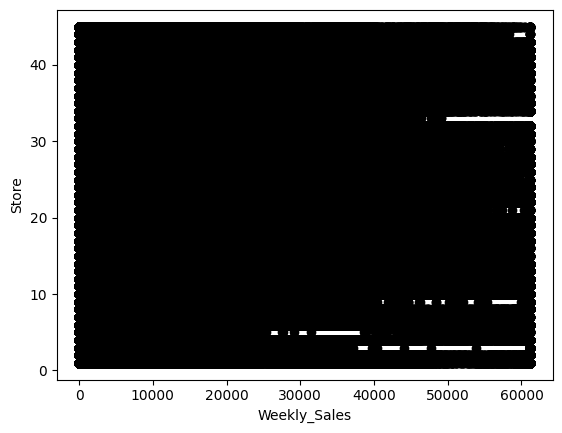

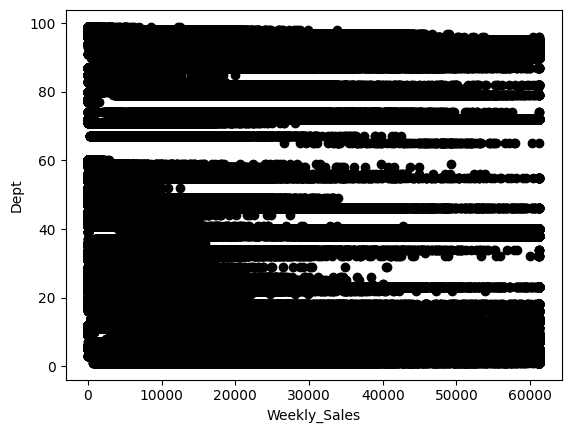

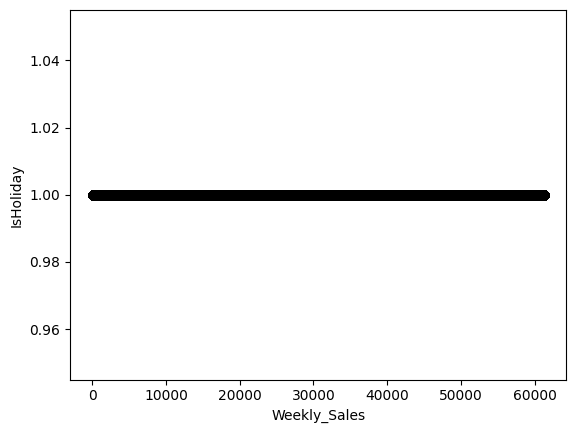

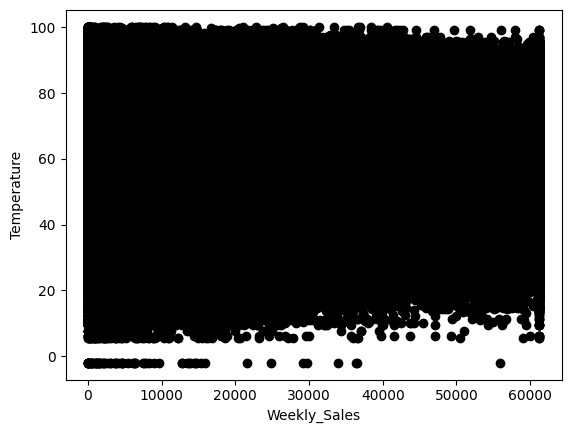

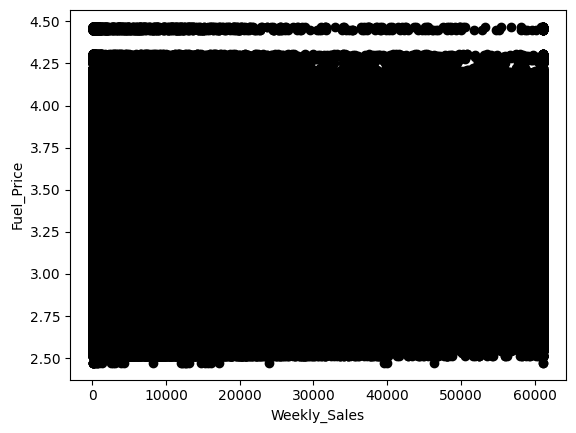

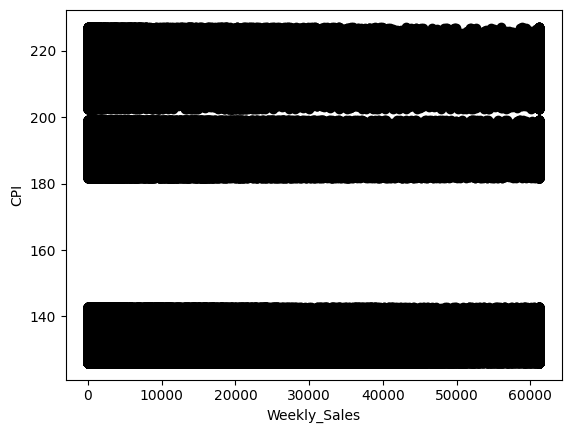

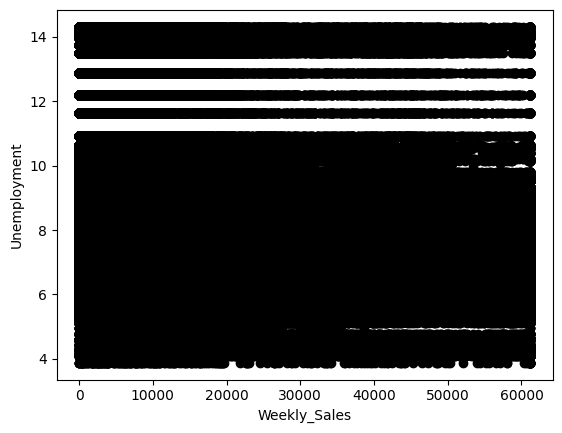

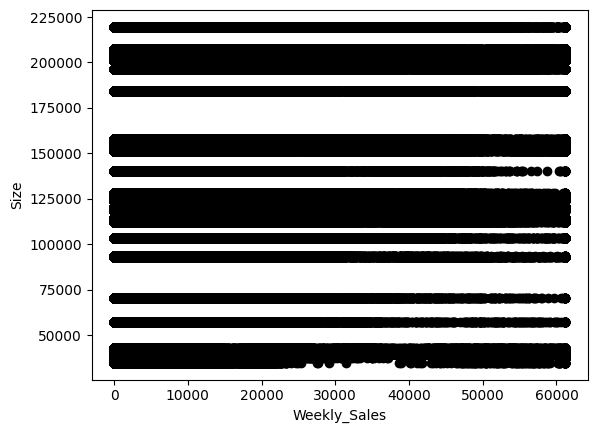

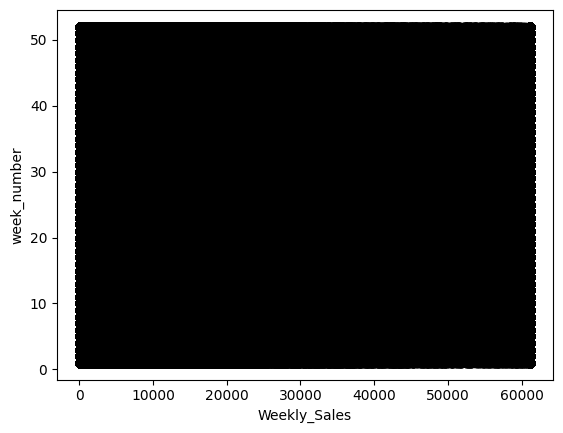

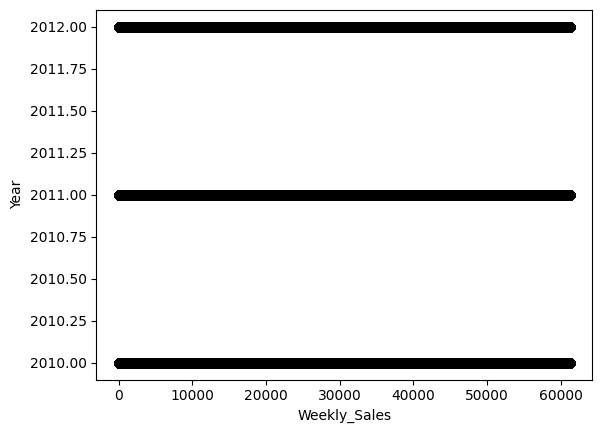

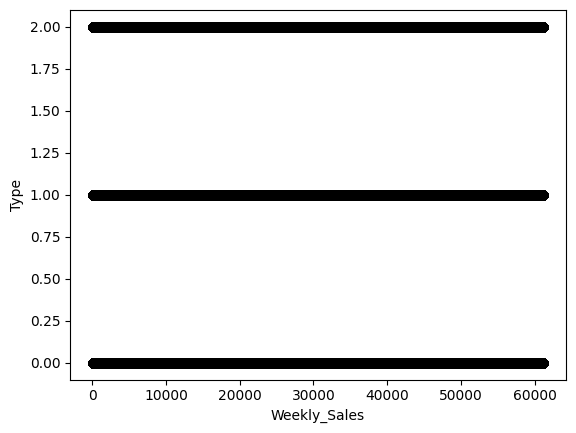

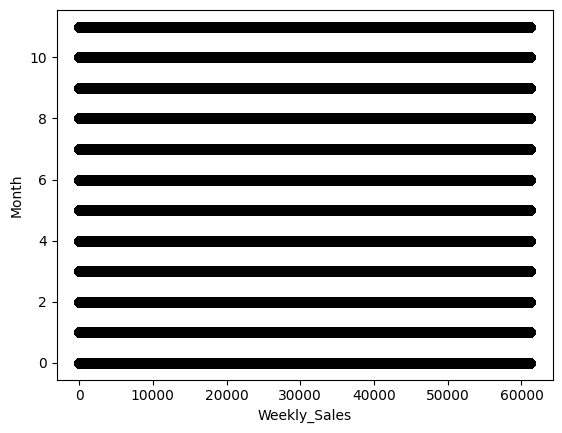

In [ ]:
#checking if there are correlation with each variables with the output variable (weekly_sales)
plot_check = new_df[['Store', 'Dept', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Size', 'week_number', 'Year',
       'Type', 'Month']]
for i in plot_check:
  plt.scatter(new_df.Weekly_Sales,plot_check[i],color='black')
  plt.xlabel("Weekly_Sales")
  plt.ylabel(i)
  plt.show()

#Observation

Based on the above plots, it is evident that there is no strong correlation between the variables. Therefore, alternative techniques for correlating the data will be explored. However, before proceeding, it is recommended that the columns for Temperature, CPI, and unemployment be dropped as they are not necessary for creating a model. Moreover, upon closer inspection of the plot, it is clear that these variables are significantly out of correlation with the other variables.

In [ ]:
#droping 'Temperature','CPI','Unemployment' column
drop_col = ['Temperature','CPI','Unemployment','Temperature_val', 'Fuel_Price_val', 'CPI_val']
new_df.drop(drop_col, axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

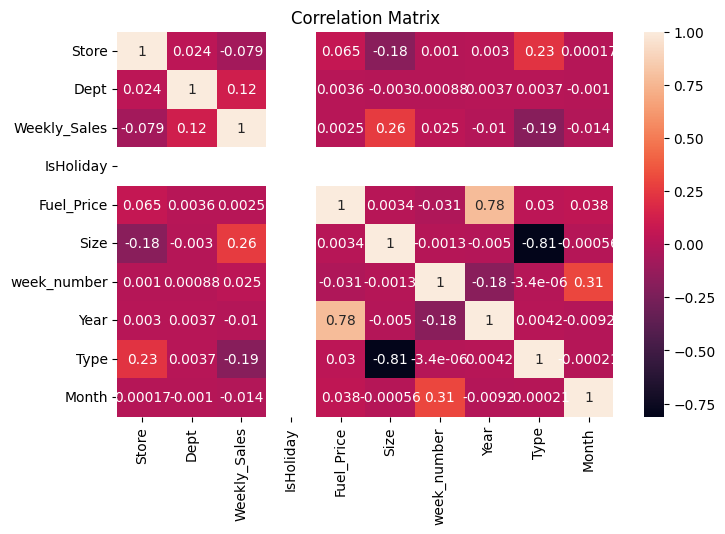

In [ ]:
#checking the correlation matrix
plt.figure(figsize=(8,5))
sb.heatmap(new_df.corr(),annot=True)
plt.title('Correlation Matrix')

In [ ]:
# lets see the columns that have good correlation with weekly sales
cor=new_df.corr()
#To get absolute correlation
abs_cor=abs(cor['Weekly_Sales'])
#Droping the NAN values
abs_cor.dropna(inplace=True)
#reseting the index and renaming thier columns
a=abs_cor.reset_index().rename(columns={'index':'Variables','Weekly_Sales':'Correlation'})
#taking correlation greater than -0.5
corr_cols=a[(a.Correlation>-0.5)].sort_values('Correlation',ascending=False)
corr_cols.head()

,Variables,Correlation
2,Weekly_Sales,1.000000
4,Size,0.258567
7,Type,0.190091
1,Dept,0.119118
0,Store,0.079015


#Note

When dealing with scenarios where there is low correlation between variables, building a dependable machine learning model can be a daunting task. To overcome this challenge, it is advisable to explore ensemble methods such as random forests or combining various regression models through the Voting technique, as they have the potential to enhance the accuracy of the model even when variables have a low correlation.

In the next section, I will build a model by combining several regression models using a voting technique called VotingRegressor to build an ensemble. This will give me an average accuracy score, which I will use to evaluate the performance of the model. I will also try another ensemble method called RandomForestRegressor and compare the results to see which model will give me the highest accuracy.

#MODEL BUILDING

In [ ]:
#Installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing regression models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, SGDRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Inputs variables
X=new_df[['Store', 'Dept', 'IsHoliday', 'Fuel_Price', 'Size',
       'week_number', 'Year', 'Type', 'Month']].values
#Output variable
labels=df['Weekly_Sales']

In [ ]:
#spliting my dataset into traing 70% and testing 30%
X_train,X_test,y_train,y_test=train_test_split(X,labels,test_size=0.30)
#let's see the shape of our tran and test dataset
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (295099, 9) (295099,)
Test set: (126471, 9) (126471,)


In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Building an Esembler, using the VotingRegressor Technique

In [ ]:
#Importing the pipeline liberary
from sklearn.pipeline import Pipeline

In [ ]:
# create regression models
lr = LinearRegression()
ridge = Ridge(alpha=10.0)
DTr = DecisionTreeRegressor(max_depth=10, min_samples_split=5)
Cbr = CatBoostRegressor(learning_rate=0.1, depth=6, random_state=42)
Gdbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# create ensemble model using voting technique
estimators = [('lr', lr), ('ridge', ridge), ('dtree',DTr), ('Cbr',Cbr), ('Gdbr',Gdbr)]
ensemble = VotingRegressor(estimators)

# fit ensemble model to training data
pipeline = Pipeline([('scaler', StandardScaler()), ('ensemble', ensemble)])
pipeline.fit(X_train, y_train)

# evaluate performance on testing data
y_pred = pipeline.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred)
r2_score_voting = r2_score(y_test, y_pred)



0:	learn: 16499.5469727	total: 83ms	remaining: 1m 22s
1:	learn: 15963.9953021	total: 115ms	remaining: 57.3s
2:	learn: 15497.3397815	total: 145ms	remaining: 48.1s
3:	learn: 15106.6666706	total: 175ms	remaining: 43.7s
4:	learn: 14776.9913142	total: 206ms	remaining: 40.9s
5:	learn: 14494.2467398	total: 238ms	remaining: 39.4s
6:	learn: 14255.1278234	total: 270ms	remaining: 38.3s
7:	learn: 14003.6271245	total: 304ms	remaining: 37.7s
8:	learn: 13818.2350047	total: 357ms	remaining: 39.3s
9:	learn: 13360.3170326	total: 392ms	remaining: 38.8s
10:	learn: 12915.6723501	total: 436ms	remaining: 39.2s
11:	learn: 12773.9719292	total: 474ms	remaining: 39s
12:	learn: 12643.1498738	total: 510ms	remaining: 38.7s
13:	learn: 12307.7947468	total: 545ms	remaining: 38.4s
14:	learn: 12198.1474170	total: 573ms	remaining: 37.6s
15:	learn: 11881.9301129	total: 605ms	remaining: 37.2s
16:	learn: 11747.4111297	total: 636ms	remaining: 36.8s
17:	learn: 11635.6178527	total: 665ms	remaining: 36.3s
18:	learn: 11402.07428

In [ ]:
# displaying the output accuracy of the esemble model created
print("Ensemble model MSE: ", mse_voting)
print("Ensemble model Accuracy: ", r2_score_voting)

Ensemble model MSE:  70764558.1799105
Ensemble model Accuracy:  0.7594885613616232


In [ ]:
#Created Esemble model display
ensemble

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('ridge', Ridge(alpha=10.0)),
                            ('dtree',
                             DecisionTreeRegressor(max_depth=10,
                                                   min_samples_split=5)),
                            ('Cbr',
                             <catboost.core.CatBoostRegressor object at 0x7fd9414e3790>),
                            ('Gdbr',
                             GradientBoostingRegressor(max_depth=5,
                                                       random_state=42))])

In [ ]:
#prediction
pred=ensemble.predict(X_test_scaled)
#displaying the actual and predicted values
md=pd.DataFrame({'Actual_values':y_test,'Predicted':pred})
md.head(8)

,Actual_values,Predicted
224773,209.00,8147.647398
190303,33281.93,25531.483496
258304,31595.46,21661.174243
264795,4894.89,9573.769492
329616,39414.59,25854.241059
385805,32558.46,25595.187667
83492,7789.72,11664.000110
281690,14461.62,12257.145898


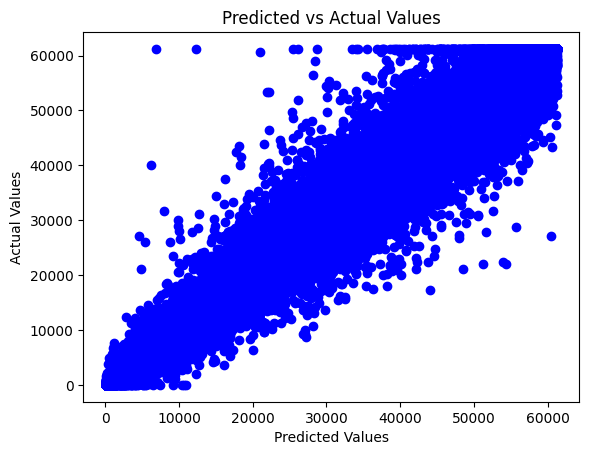

In [ ]:

# Scatter plot of predicted vs actual values
plt.scatter(md['Predicted'], md['Actual_values'], color='blue')
plt.title('Predicted vs Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


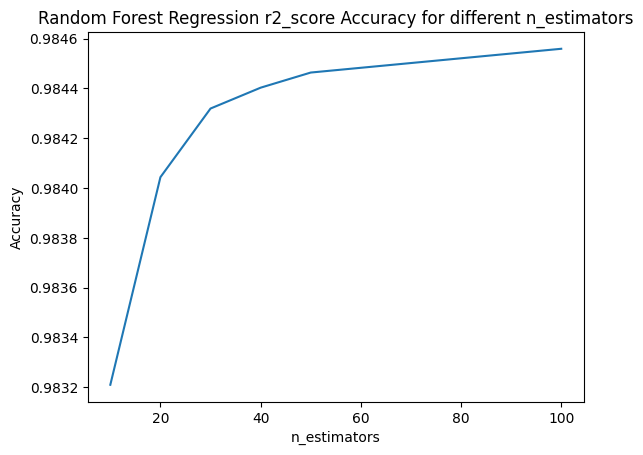

In [ ]:
# plot mean squared error for different values of n_estimators in Random Forest Regression
n_estimators_values = [10, 20, 30, 40, 50,100]
r2_rf=[]
for n in range(len(n_estimators_values)):
    rf = RandomForestRegressor(n_estimators=int(n_estimators_values[n]), random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred_rf = rf.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred_rf)
    r2=r2_score(y_test,y_pred_rf)
    r2_rf.append(r2)

plt.plot(n_estimators_values, r2_rf)
plt.title("Random Forest Regression r2_score Accuracy for different n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()






I will be Using when n_estimator of the random forest regressor is equal 100

In [ ]:
#initializing random forest regresion, with n_estimators of 100
rfr_final_estimator=RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaled,y_train)
#using randomforest fitted to predict
rf_pred=rfr_final_estimator.predict(X_test_scaled)
mse = mean_squared_error(y_test, rf_pred)
mae= mean_absolute_error(y_test, rf_pred)
rf_accuracy=r2_score(y_test, rf_pred)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Accuracy: {rf_accuracy}")


MSE: 4543126.235741191
MAE: 1076.1979732689804
Accuracy: 0.9845590242491746


In [ ]:
#displaying the actual and predicted values
df_rfr=pd.DataFrame({'Actual_values':y_test,'Pred':rf_pred})
df_rfr.head(8)

,Actual_values,Pred
224773,209.00,298.7244
190303,33281.93,31711.5414
258304,31595.46,30732.4448
264795,4894.89,4184.2362
329616,39414.59,32601.4775
385805,32558.46,31222.2776
83492,7789.72,8977.4655
281690,14461.62,12609.5265


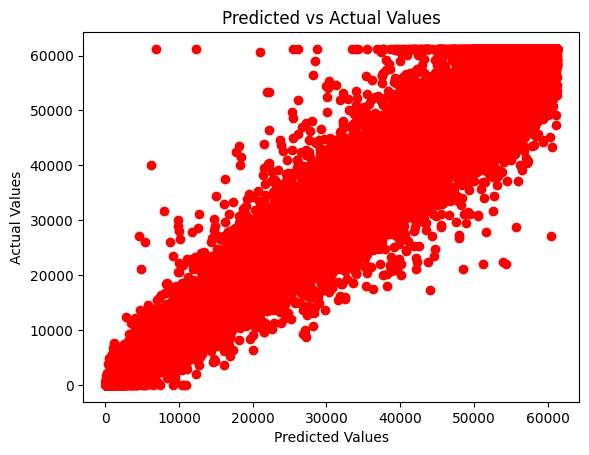

In [ ]:
#Scatter plot of predicted vs actual values
plt.scatter(df_rfr['Pred'], df_rfr['Actual_values'], color='red')
plt.title('Predicted vs Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

From our model, we can see that Random Forest regression has the highest accuracy of 98%,so i will be using it for prediction

#Observation

After analyzing an ensemble model consisting of four regressors (Linear Regression, CatBoost, Ridge Regression, and Gradient Regression), the model achieved a moderate accuracy score of 75%. However, the model's Mean Squared Error (MSE) was high, which affected its performance in prediction. The Random Forest Regressor with n_estimator=100 had the highest accuracy from the plot and performed well in predicting values. The model achieved an accuracy of 98%, indicating that it correctly predicted 98% of instances. Note that the Random Forest Regressor is also an ensemble model that combines various decision trees.



#Limitation

One of the biggest challenges I faced during this project was performing a thorough analysis using all the columns in my dataset to effectively answer my analytical questions. However, with the help of Dr. Sandeep, my workshop tutor, who reviewed my initial work and encouraged me to think more deeply, I was able to overcome this challenge and conduct more in-depth analysis.

Another challenge I encountered was attempting to use the ANN model for this dataset. However, it performed poorly and did not provide useful results, so I was unable to use the ANN model for my analysis.


#APPLYING CROSS VALIDATION


Cross-validation is a technique used in machine learning to evaluate how well a predictive model generalizes to new data. It involves splitting the available data into multiple subsets or folds, where each fold is used once as a validation set while the rest of the data is used as a training set.

In [ ]:
#Importing the liberies
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Create scaler object and fit to data
X_scaled = scaler.fit_transform(X)

In [ ]:
#cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model=RandomForestRegressor(n_estimators=100, random_state=42)
results = cross_val_score(model, X_scaled, labels, cv=kfold)

# Print results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 98.51% (0.03%)


From the Above Observation

The reported accuracy of 98.51% indicates that the model correctly predicted the target variable for 98.51% of the instances in the test set, on average, across all K folds. The value in parentheses, 0.03%, represents the standard deviation of the accuracy estimates obtained from the K folds. This suggests that the accuracy estimates were consistent across the folds, with a small amount of variability.

Overall, K-fold cross-validation is a widely used technique in machine learning to evaluate the performance of models and to estimate their generalization performance on new, unseen data. By using multiple folds, K-fold cross-validation provides a more reliable estimate of the model's performance and can help prevent overfitting to the training data.